In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
%matplotlib inline 

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

'%matplotlib inline' will make the plot outputs appear and be stored within the notebook.

In [167]:
data = pd.read_csv('/Users/hyunminhong/Documents/Programmings/Python_Jupyter/Projects/hotel-booking/dataset/hotel_bookings.csv')

# Feature Engineering

In [38]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [77]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [78]:
print(data.isnull().sum(), 'the size of the data is:', len(data), sep = '\n\n') # we can see how many observations are missing

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [30]:
data.info() # show the general information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [44]:
data.isnull().any() # we can see better whether an attribute has null value or not

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
days_in_waiting_list              False


**Note that there are too many null values for 'agent' and 'company' attribute, thus we decided to drop the agent and company attribute.**

In [79]:
data = data.drop(['agent', 'company'], axis = 1) # we drop the 'agent' and 'company' attribute

Furthermore, we can see that there are null values in 'children' and 'country'. We will see whether these attributes are significant or not in explanatory data analysis (EDA). 

# Explanatory Data Analysis (EDA)

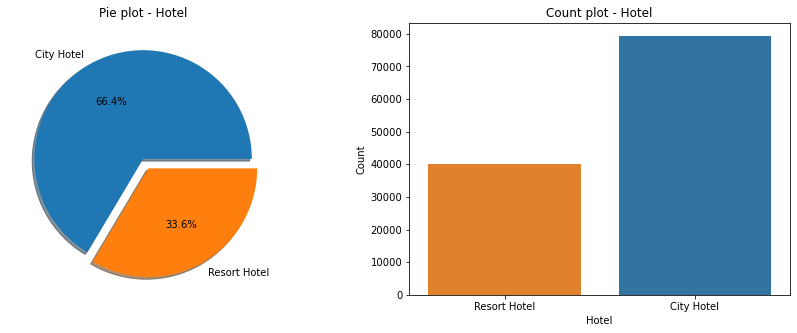

In [137]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

data['hotel'].value_counts().plot.pie(explode = [0,0.1], autopct = '%0.1f%%',
                                      ax = ax1, shadow = True)
ax1.set_title('Pie plot - Hotel')
ax1.set_ylabel('')

palette = [sns.color_palette()[1], sns.color_palette()[0]]

sns.countplot('hotel', data = data, ax = ax2, palette = palette)
ax2.set_title('Count plot - Hotel')
ax2.set_xlabel('Hotel')
ax2.set_ylabel('Count')

plt.show()

From the above plots, we conclude that the data is in balance. 

Here, **balanced data** means that the number of *city hotel* values and *resort hotel* values are approximately the same.

Before we plot, let us firstly transform the target variable into numeric variable. By doing so, we can compute the correlation 

## Histogram

The purpose of a histogram is to graphically summarize the distribution of a univariate data set.

The histogram graphically shows the following:

1. center (i.e., the location) of the data;
2. spread (i.e., the scale) of the data;
3. skewness of the data;
4. presence of outliers; 
5. presence of multiple modes in the data.

In [268]:
data.columns[31]

'reservation_status_date'

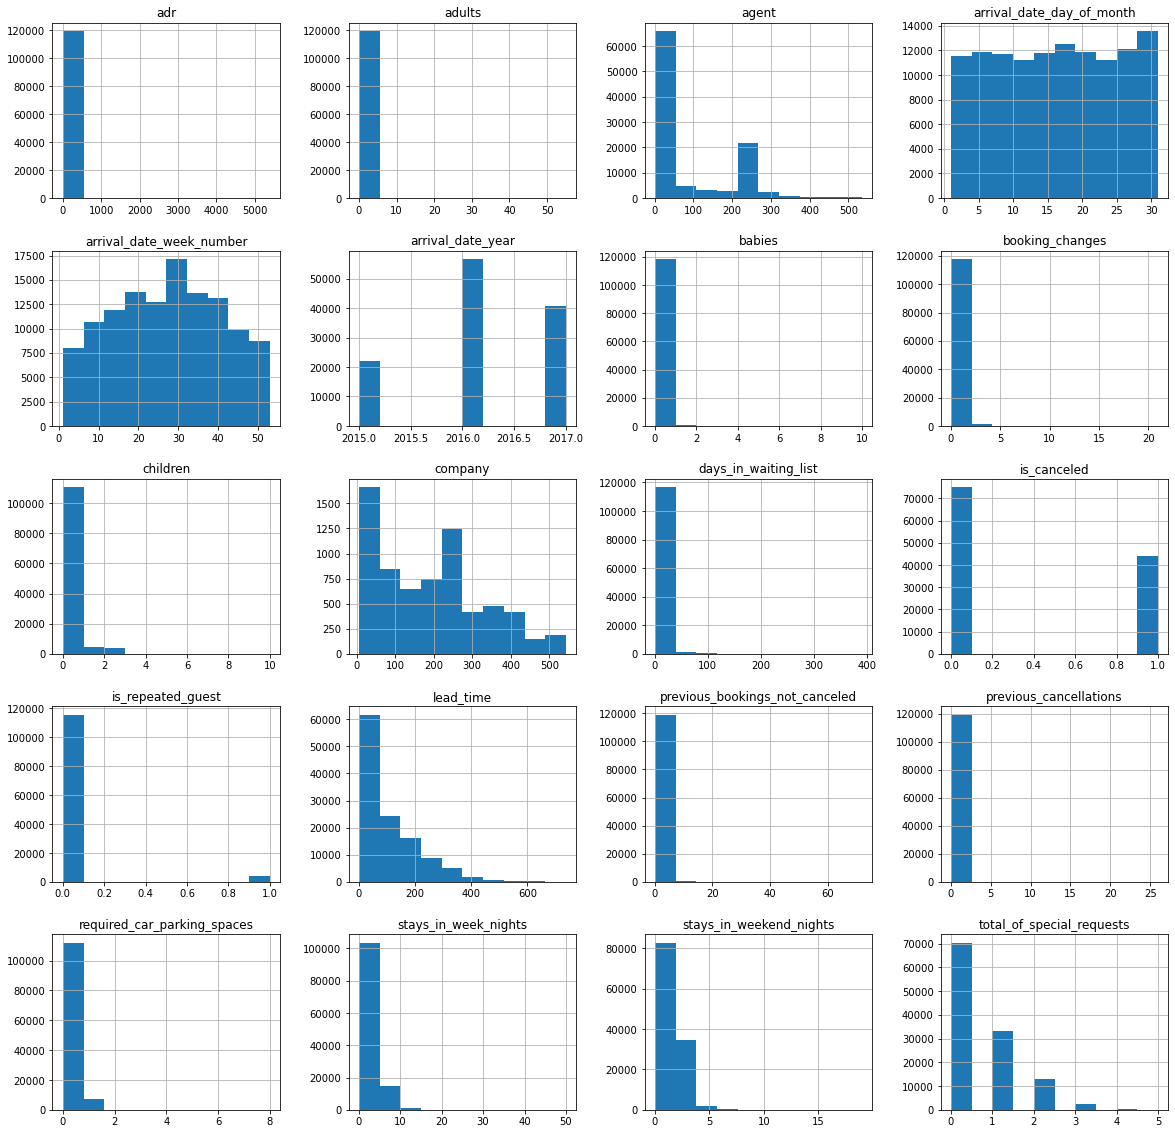

In [171]:
data.hist(figsize = (20,20))
plt.show()

The above histograms give small intuitions of how the data looks like, e.g., the distribution of 'booking_chaanges' is skewed. Also, we can see that there are no serious outlier problem that we need to take into account. 

## Kernel Density Estimation (KDE)

The kernel density estimate plot shows the distribution of a single variable (think of it as a smoothed histogram). With KDE, we want to look at the distributions dependent on the value of a categorical variable.

In [255]:
# plots the disribution of a variable colored by value of the target
def kde_target(data, var_name, ax):
    # set the preferable style (depends on user's preference of course)
    sns.set_style("darkgrid")
    # plot KDE of the target variable versus one of the attribute
    sns.kdeplot(data[data['hotel'] == 'Resort Hotel'][var_name], label = 'Resort Hotel', ax = ax)
    sns.kdeplot(data[data['hotel'] == 'City Hotel'][var_name], label = 'City Hotel', ax = ax)
    
    # labelling
    ax.set_xlabel(var_name)
    ax.set_ylabel('density')
    ax.set_title('KDE')

**Example.**

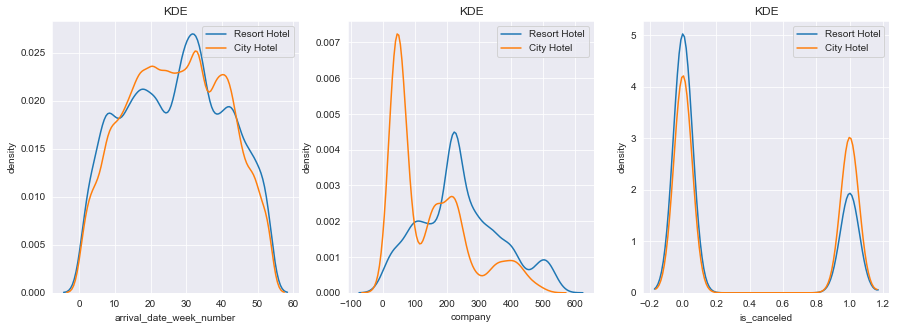

In [277]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

kde_target(data, 'arrival_date_week_number', ax = ax[0])
kde_target(data, 'company', ax = ax[1])
kde_target(data, 'is_canceled', ax = ax[2])

## Assessing usefulness of variables

There are several ways to assess how useful an attribute is to the target variable. For simplicity, we will use the following to measure the usefulness of variables. 

1. Pearson's correlation coefficient (i.e., Pearson's r)